# **Finanzas Computacionales**

# **Taller 2**

*Juan Esteban González - David Esteban González Gómez*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize #minimizar cualquier tipo de funcion
from scipy.optimize import linprog 
import cvxpy as cp
!pip install yfinance
import yfinance as yf


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 13.2 MB/s eta 0:00:00
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting un

# Punto 1

In [2]:
# Data
df = pd.DataFrame({' ' : ['Materia Prima', 'Mano de Obra', 'Capital', 'Ganancia'],
        'Product A' : [1, 2, 1, 3],
        'Product B' : [1, 4, 2, 5]})
df

,,Product A,Product B
0,Materia Prima,1,1
1,Mano de Obra,2,4
2,Capital,1,2
3,Ganancia,3,5


In [ ]:
# Max 3A + 5B
# Restricción 1 =    1X + 1X >= 500
#                    4Y + 2Y >= 1000
#                    3Z + 2Z >= 2000
#                    X,Y,Z >= 0
# A >= 100
# B >= 150

In [3]:
# Objective function parameters
c = np.array([3, 5])

# Inequality constraints  
A = np.array([[1, 1], #Coeficientes asociados a cada restricción 
                  [2, 4],
                [1, 2],
              [-1,0],
              [0,-1]])
b = np.array ([500, 1000, 2000, -100, -150]) #Cantidades Maximas posibles 


# Solve the problem: #eq igualdad ub desigualdad
sol = linprog(-c, A_ub= A, b_ub= b, method='revised simplex')

sol

<ipython-input-3-e63dce67d922>:14: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  sol = linprog(-c, A_ub= A, b_ub= b, method='revised simplex')


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -1350.0
       x: [ 2.000e+02  1.500e+02]
     nit: 2

In [4]:
# Objective function parameters
c = np.array([3, 5])

# Inequality constraints  
A = np.array([[1, 1], #Coeficientes asociados a cada restricción 
                  [2, 4],
                [1, 2]])
b = np.array ([500, 1000, 2000]) #Cantidades Maximas posibles 

# Bounds on decision variables #Numero de linea de las bandas debe corresponder con el numero de variables - Las bandas recaen sobre x 
bounds2 = [(  100,    None),
             (150, None)]

# Solve the problem: #eq igualdad ub desigualdad
sol = linprog(-c, A_ub= A, b_ub=b, bounds = bounds2, method='revised simplex')

sol

<ipython-input-4-3c17aa7ce29f>:15: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  sol = linprog(-c, A_ub= A, b_ub=b, bounds = bounds2, method='revised simplex')


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: -1350.0
       x: [ 2.000e+02  1.500e+02]
     nit: 2

# Punto 2 

In [5]:
# Objective function parameters
c = np.array([0.10, 0.15, 0.16, 0.08])

# Inequality constraints  
A_ub = np.array([[0.5, 0.3, 0.25,0.6], #Coeficientes asociados a cada restricción 
                  [0.3, 0.1, 0.4, 0.2],
                [0.2, 0.6, 0.35, 0.2]])
b_ub = np.array ([0.35, 0.30, 0.15]) #Cantidades Maximas posibles 

# Equality constraints
A_eq = np.array([[1,1,1,1]])
b_eq = np.array([1])

# Bounds on decision variables #Numero de linea de las bandas debe corresponder con el numero de variables
bounds2 = [(  0,    None),
           (  0,    None),
           (  0,    None),
              (0, None)]

# Solve the problem: #eq igualdad ub desigualdad (Positivo > o igual(-)Limite inferior)(Negativo < o igual(+)Limite superior)
##mayo o igual positivo y menor o igual negativo
res = linprog(-c, A_ub=-A_ub, b_ub=-b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds2, method='revised simplex')
pd.DataFrame(res.x).round(4)

<ipython-input-5-4750ccf1f782>:22: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(-c, A_ub=-A_ub, b_ub=-b_ub, A_eq=A_eq, b_eq=b_eq, bounds=bounds2, method='revised simplex')


,0
0,0.0000
1,0.1579
2,0.5789
3,0.2632


In [6]:
import cvxpy as cp
n = len(c)
x = cp.Variable(n) #NUMERO DE ELEMENTOS ASOCIADOS A LAS INCOGNITAS 
objetivo= cp.Minimize(-c@x) #Si se maximiza se coloca menos a la C            
restricciones=[A_ub @ x >= b_ub,cp.sum(x) ==1, x >= 0]
prob=cp.Problem(objetivo,restricciones)
prob.solve()
pd.DataFrame(x.value)

,0
0,3.637706e-08
1,1.578947e-01
2,5.789474e-01
3,2.631579e-01


# Punto 3

In [7]:
c=np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,1])#

A=np.array([[1,0,0,0,0,1,0,0,-1,0,0,0,0,0],
            [-1.01,1,0,0,0,0,1,0,1.003,-1,0,0,0,0],
            [0,-1.01,1,0,0,0,0,1,0,1.003,-1,0,0,0],
            [0,0,-1.01,1,0,-1.02,0,0,0,0,1.003,-1,0,0],
            [0,0,0,-1.01,1,0,-1.02,0,0,0,0,1.003,-1,0],
            [0,0,0,0,-1.01,0,0,-1.02,0,0,0,0,1.003,-1]])

b=np.array([150,100,-200,200,-50,-300])

Bounds=[(0,100),
        (0,100),
        (0,100),
        (0,100),
        (0,100),
        (0,None),
        (0,None),
        (0,None),
        (0,None),
        (0,None),
        (0,None),
        (0,None),
        (0,None),
        (0,None)]
res = linprog(-c, A_eq=A, b_eq=b,
                  bounds=Bounds, method='revised simplex')

res.x


<ipython-input-7-6248a1a52fe6>:26: DeprecationWarning: `method='revised simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(-c, A_eq=A, b_eq=b,


array([  0.        ,  50.98039216,   0.        ,   0.        ,
         0.        , 150.        ,  49.01960784, 203.43436358,
         0.        ,   0.        , 351.9441675 ,   0.        ,
         0.        ,  92.49694915])

In [8]:
#cvx
n=len(c)
x = cp.Variable(n)
objetivo= cp.Minimize(-c.T@x)  
restricciones=[A @ x >= b, x>=0] 
prob=cp.Problem(objetivo,restricciones)
prob.solve(solver=cp.GLPK_MI)
# prob.solve(solver=cp.SCIPY)


round(pd.DataFrame(x.value))
#cp.scipy
#cp.GLPK_MI

,0
0,-0.0
1,51.0
2,-0.0
3,-0.0
4,-0.0
5,150.0
6,49.0
7,203.0
8,-0.0
9,-0.0


# Punto 4

In [9]:
# Tip: Salida el primer día, restricción que el saldo no se negativo como el 3
rate=1.0002**7
comision=(1.0002**7)*0.0001
Rfinal=rate-comision

c=np.array([0,0,0,0,0,0,0,1])

A=np.array([[1,0,0,0,-1,0,0,0],
           [0,1,0,0,Rfinal,-1,0,0],
           [0,0,1,0,0,Rfinal,-1,0],
           [0,0,0,1,0,0,Rfinal,-1]])

b=np.array([-150,100,50,-200])



res=linprog(-c, A_ub=A, b_ub=b,
                  method='simplex')
res

<ipython-input-9-33742d46ef21>:17: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res=linprog(-c, A_ub=A, b_ub=b,


 message: Optimization failed. The problem appears to be unbounded.
 success: False
  status: 3
     fun: -200.26073250663836
       x: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00  1.500e+02
            5.020e+01  2.604e-01  2.003e+02]
     nit: 4

# Punto 6 

In [10]:
# J = [1,2,3] Instalaciones 
# I = [1,2,3,4,5] Puntos de Demanda
# M = [500,500,500] Volumen de Ventas
# Costos Fijos por Planta = ([[4,5,6,8,10],
#           [6,4,3,5,8],
#           [9,7,4,3,4]])

In [11]:
c1=np.array([[4,5,6,8,10],
           [6,4,3,5,8],
          [9,7,4,3,4]])
b=np.array([500,500,500])
Cf=np.array([1000,1000,1000])
b2=np.array([80,270,250,160,180])
x = cp.Variable((3,5),nonneg=True)
y= cp.Variable(3,boolean=True)
objetivo= cp.Minimize(cp.sum(cp.multiply(c1,x))+cp.sum(cp.multiply(Cf,y)))   #multiply
restricciones=[cp.sum(x[0,:])<=500*y[0],cp.sum(x[1,:])<=500*y[1],cp.sum(x[2:])<=500*y[2],cp.sum(x[:,0])==b2[0],
               cp.sum(x[:,1])==b2[1],cp.sum(x[:,2])==b2[2],cp.sum(x[:,3])==b2[3],
               cp.sum(x[:,4])==b2[4],cp.sum(y)==2]  # indices matriz
prob=cp.Problem(objetivo,restricciones)
prob.solve()
x.value

array([[ -0.,  -0.,  -0.,  -0.,  -0.],
       [ 80., 270., 150.,  -0.,  -0.],
       [ -0.,  -0., 100., 160., 180.]])

In [12]:
valores = round(pd.DataFrame(x.value),2)
valores

,0,1,2,3,4
0,-0.0,-0.0,-0.0,-0.0,-0.0
1,80.0,270.0,150.0,-0.0,-0.0
2,-0.0,-0.0,100.0,160.0,180.0


# Extra frontera eficiente (reemplazo punto 5)

In [13]:
activos=['DIS','AAPL','BA','TSLA']
precios=yf.download(['DIS','AAPL','BA','TSLA'],start='2017-12-01',end='2022-12-31',interval='1mo')['Adj Close']
retornos=np.log(precios/precios.shift()).dropna()
cov=retornos.cov()

[*********************100%***********************]  4 of 4 completed


In [14]:
n=len(activos)
unos=np.repeat(1,n)
wpmvg=np.linalg.solve(cov,unos)/sum(np.linalg.solve(cov,unos))

In [15]:
mu=retornos.mean()
Retornos_p=np.linspace(min(mu),max(mu),99)
 #quadform es decir la forma cuadrática
wpmvgs=[]
varianza=[]
for i in range(0,99):
  x=cp.Variable(n)
  objetivo=cp.Minimize(cp.quad_form(x,cov))
  restricciones=[x @ mu ==Retornos_p[i],cp.sum(x)==1] #[x @ mu ==i]
  prob=cp.Problem(objetivo,restricciones)
  prob.solve()
  wpmvgs.append(x.value)
  
wpmvgs=pd.DataFrame(wpmvgs,columns=['AAPL','BA','DIS','TSLA'])
#wpmvgs['varianzas']=wpmvgs.T@cov@wpmvgs
for k in range(0,99):
   varianza.append(wpmvgs.iloc[k,:].T@cov@wpmvgs.iloc[k,:])
wpmvgs
varianza=pd.DataFrame(varianza)
Retornos_p=pd.DataFrame(Retornos_p)

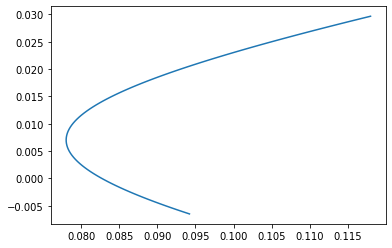

In [16]:
ig,ax=plt.subplots()
ax.plot(np.sqrt(varianza),Retornos_p)
plt.show() #?? creo que es por los negativos